In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import re

%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 200)

In [2]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')

default_dir = "/content/gdrive/My Drive"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df_train = pd.read_csv(os.path.join(default_dir,"train.csv")) # 학습용 데이터
df_test = pd.read_csv(os.path.join(default_dir,"submission.csv")) # 테스트 데이터(제출파일의 데이터)

In [4]:
def plot_target_ratio_by_feature(df, feature, size=(5, 5)):
    plt.figure(figsize=size)
    sns.barplot(x=feature, y='is_converted', data=df, palette='Set2')

In [5]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,customer_job,lead_desc_length,inquiry_type,product_category,product_subcategory,product_modelname,customer_country.1,customer_position,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,NaN,purchasing,62,Quotation or purchase consultation,multi-split,NaN,NaN,/Quezon City/Philippines,entry level,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,NaN,media and communication,96,Quotation or purchase consultation,multi-split,NaN,NaN,/PH-00/Philippines,ceo/founder,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,NaN,engineering,56,Product Information,single-split,NaN,NaN,/Kolkata /India,partner,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,NaN,entrepreneurship,44,Quotation or purchase consultation,vrf,NaN,NaN,/Bhubaneswar/India,ceo/founder,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,NaN,consulting,97,Quotation or purchase consultation,multi-split,NaN,NaN,/Hyderabad/India,partner,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


# #1 bant_submit
- 결측치 없다

In [6]:
df_train['bant_submit'].value_counts()

0.50    17192
1.00    17061
0.25    12852
0.75    11681
0.00      513
Name: bant_submit, dtype: int64

In [7]:
bant_submit_counts = df_train.groupby('bant_submit')['is_converted'].value_counts()
print(bant_submit_counts)

bant_submit  is_converted
0.00         False             431
             True               82
0.25         False           11580
             True             1272
0.50         False           16255
             True              937
0.75         False           10564
             True             1117
1.00         False           15619
             True             1442
Name: is_converted, dtype: int64


<ipython-input-4-5128915bcf84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='is_converted', data=df, palette='Set2')


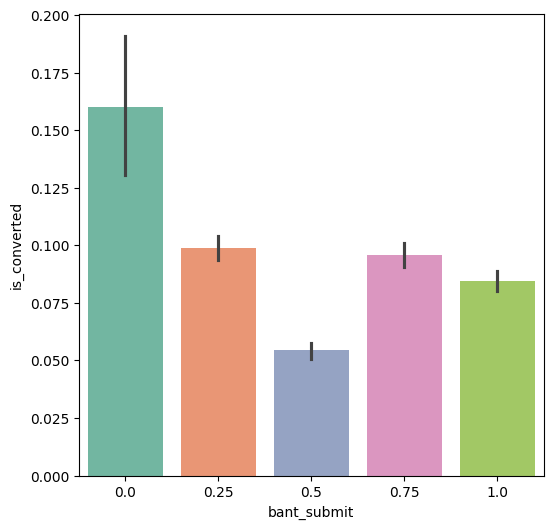

In [8]:
plot_target_ratio_by_feature(df_train, 'bant_submit', size=(6, 6))

# #2 customer_country
- customer_country.1과 동일
- 슬래시 기준으로 City와 Country 새로운 칼럼 만들 수 있음
- 결측치 0.016560


In [9]:
df_train['customer_country'] = df_train['customer_country'].str.upper()
df_train['City'] = df_train['customer_country'].str.split('/').str[1].str.strip()
df_train['Country'] = df_train['customer_country'].str.split('/').str[2].str.strip()
df_test['customer_country'] = df_test['customer_country'].str.upper()
df_test['City'] = df_test['customer_country'].str.split('/').str[1].str.strip()
df_test['Country'] = df_test['customer_country'].str.split('/').str[2].str.strip()

In [10]:
missing_values = df_test[~df_test['Country'].isin(df_train['Country'])]['Country']
df_test.loc[df_test['Country'].isin(missing_values), 'Country'] = "None"

# #3 business_unit
- 결측치 없다

In [11]:
print(df_train['business_unit'].value_counts(dropna = False))
print(df_test['business_unit'].value_counts(dropna = False))

ID          25563
AS          24774
IT           8664
Solution      296
CM              2
Name: business_unit, dtype: int64
AS    2410
ID    2342
IT     519
Name: business_unit, dtype: int64


# #5 customer_idx
- 결측치 없다

In [12]:
print(df_train['customer_idx'].value_counts(dropna = False))

47466    7686
25096    2421
37680     367
18030     331
21321     162
33350     135
43395      91
25309      90
33763      88
32240      84
37654      76
31864      71
37657      67
19804      65
29370      61
40344      59
21389      51
7195       50
37399      45
42067      43
14746      43
33776      33
742        30
6555       29
1747       28
46271      27
21883      26
37306      26
40491      26
4936       26
33773      25
9624       25
16590      23
33334      23
41291      22
7810       21
26780      21
20273      20
41505      20
8750       20
42108      19
44254      19
7740       19
31510      19
14804      18
15537      18
17224      18
37643      18
40542      17
20647      16
45319      16
47435      16
32806      16
39506      15
30184      15
310        15
32086      14
22865      14
30207      14
25354      14
9324       14
12753      14
37310      14
21239      14
12193      14
37607      14
28562      14
26337      14
13130      14
963        13
27735      13
46458 

In [13]:
converted_customers1 = df_train[df_train['is_converted'] == True]['customer_idx'].unique()
converted_customers1
converted_customers2 = df_test[df_test['is_converted'] == True]['customer_idx'].unique()
converted_customers2

array([47466,  5405, 46010, 26303, 38519, 34023, 27420, 37769, 24564,
        9324, 23402, 28546, 20424,  9530,   874, 30344, 41580,  3910,
       22975, 42064, 37250,  9786, 11579,  9030, 27712, 42493, 30423,
       33287, 41137, 21595, 11308, 18637,  1781, 40106, 40271, 35824,
       14432, 21107, 11893,  9522, 41784, 35121, 38090,  5142, 32868,
       10896, 26585, 28442,  7241, 47146, 32498, 27735, 46753, 32709,
       11807, 30665,  6942, 32968, 30008,  9211, 37070, 31971, 41988,
       20766, 23181, 22314, 39502, 30081, 19954, 31487, 44227, 30360,
       29383, 42801, 46078, 36411, 21590, 34768, 28727, 39179, 15796,
       27514, 36100,   256, 36850, 34222, 44558,  5043, 32240, 25044,
        7646, 45711, 38351, 19764, 16279, 26468, 28180, 32691, 21681,
       24619, 24675, 37773,  4455, 27105, 29238, 28762,  9135, 40119,
        5961, 39702, 15937, 39968, 43186, 26749, 46009, 12195, 30787,
        6299, 45302, 25368, 24204, 34326, 46452,  6481, 40692,  4343,
       16480, 15872,

In [14]:
converted_customers1_set = set(converted_customers1)
converted_customers2_set = set(converted_customers2)

intersection_count = len(converted_customers1_set.intersection(converted_customers2_set))
print("두 배열 간의 공통 요소 개수:", intersection_count)

두 배열 간의 공통 요소 개수: 43


# #6 customer_type
- LG inquiry-to-buy 참고해서 재범주화
- 결측치 0.741345
- 결측치 "NONE"으로 바꾸기

In [15]:
df_train['customer_type'] = df_train['customer_type'].str.lower().str.replace(" ", "")
df_test['customer_type'] = df_test['customer_type'].str.lower().str.replace(" ", "")

In [16]:
customer_type_mapping = { 'End Customer': ['endcustomer','end-user','end-customer','constructioncompany', 'owner/developer', 'medical/healthcarefacility', 'government/publicsector', 'corporate', 'education', 'retail', 'fitness'],
                         'Channel Partner' : ['agent','channelpartner', 'distributor','reseller', 'nsp(usonly)', 'nationalreseller', 'regionalreseller', 'si(systemintegrator)', 'proav/avconsultant', 'var(3po)'],
                          'Specifier/ Influencer': ['specifier/influencer','architect', 'consultant', 'contractor', 'technical/designfirm', 'regionbuilder', 'installer', 'ad&contentsprovider', 'appliedrep'],
                          'Solution Eco-Partner': ['solutioneco-partner','cms/webos/isv', 'mount/metalfabrication','meetingsolution', 'control/processor', 'externalcompute'],
                           'Developer': ['developer'],
                          'Service Partner': ['servicepartner','authorizedservicecenter', 'authorizedservicedealer'], }

def map_customer_type_category(value):
    for customer_type, values in customer_type_mapping.items():
        if value in values:
            return customer_type
    return value  # 매핑되지 않은 경우 원래 값을 반환

df_train['customer_type'] = df_train['customer_type'].apply(map_customer_type_category)
df_test['customer_type'] = df_test['customer_type'].apply(map_customer_type_category)

In [17]:
df_train['customer_type'].fillna("NONE", inplace=True)
df_test['customer_type'].fillna("NONE", inplace=True)

In [18]:
df_test['customer_type'].value_counts(dropna = False)

End Customer             2454
NONE                     1457
Specifier/ Influencer     788
Channel Partner           327
Solution Eco-Partner      146
Service Partner            98
Developer                   1
Name: customer_type, dtype: int64

In [19]:
df_train['customer_type'].value_counts(dropna = False)

NONE                         43961
End Customer                 10682
Specifier/ Influencer         2588
Channel Partner               1377
Service Partner                349
Solution Eco-Partner           146
installer/contractor            52
hvacengineer                    23
engineer                        20
Developer                       17
technician                      16
homeowner                       15
other                           10
manager/director                 8
software/solutionprovider        8
etc.                             6
architect/consultant             5
interiordesigner                 5
others                           4
systemintegrator                 2
dealer/distributor               2
technicalassistant               1
commercialend-user               1
administrator                    1
Name: customer_type, dtype: int64

# #7 enterprise
- 결측치 없다
- 원핫 인코딩

In [20]:
print(df_train['enterprise'].value_counts(dropna = False))

Enterprise    37783
SMB           21516
Name: enterprise, dtype: int64


In [21]:
print(df_test['enterprise'].value_counts(dropna = False))

Enterprise    3085
SMB           2186
Name: enterprise, dtype: int64


# #8 historical_existing_cnt
- 결측치 비율 0.768023

In [22]:
missing_values = df_test[~df_test['historical_existing_cnt'].isin(df_train['historical_existing_cnt'])]['historical_existing_cnt']
missing_values.value_counts(dropna = False)

223.0     4
143.0     3
204.0     3
65.0      3
98.0      1
179.0     1
2219.0    1
244.0     1
139.0     1
148.0     1
243.0     1
155.0     1
Name: historical_existing_cnt, dtype: int64

# #9 id_strategic_ver
- business_area가 corporate / office 또는 hotel & accomodataion 이고 business_unit이 ID면 1
- 결측치 위 조건에 해당하면 1, 해당하지 않으면 0

In [23]:
grouped_df = df_train.groupby('id_strategic_ver')

for id_strategic_ver, group in grouped_df:
    print(f"id_strategic_ver: {id_strategic_ver}")
    print(group[['business_area', 'business_unit','id_strategic_ver','is_converted']])

id_strategic_ver: 1.0
               business_area business_unit  id_strategic_ver  is_converted
388       corporate / office            ID               1.0          True
389       corporate / office            ID               1.0          True
390       corporate / office            ID               1.0          True
391       corporate / office            ID               1.0          True
392       corporate / office            ID               1.0          True
393       corporate / office            ID               1.0          True
394       corporate / office            ID               1.0          True
395       corporate / office            ID               1.0          True
396       corporate / office            ID               1.0          True
397       corporate / office            ID               1.0          True
398       corporate / office            ID               1.0          True
399       corporate / office            ID               1.0          True
400

In [24]:
filtered_df = df_train[((df_train['business_area'] == 'corporate / office') | (df_train['business_area'] == 'hotel & accommodation')) &
                      (df_train['business_unit'] == 'ID') &
                      (df_train['id_strategic_ver'] != 1)]

print(filtered_df)

Empty DataFrame
Columns: [bant_submit, customer_country, business_unit, com_reg_ver_win_rate, customer_idx, customer_type, enterprise, historical_existing_cnt, id_strategic_ver, it_strategic_ver, idit_strategic_ver, customer_job, lead_desc_length, inquiry_type, product_category, product_subcategory, product_modelname, customer_country.1, customer_position, response_corporate, expected_timeline, ver_cus, ver_pro, ver_win_rate_x, ver_win_ratio_per_bu, business_area, business_subarea, lead_owner, is_converted, City, Country]
Index: []


In [25]:
cond1 = (
    (df_train['business_unit'] == 'ID') &
    ((df_train['business_area'] == 'corporate / office') | (df_train['business_area'] == 'hotel & accommodation'))
    & df_train['id_strategic_ver'].isna())

cond2 = (
    (df_test['business_unit'] == 'ID') &
    ((df_test['business_area'] == 'corporate / office') | (df_test['business_area'] == 'hotel & accommodation'))
    & df_test['id_strategic_ver'].isna())

In [26]:
df_train.loc[cond1, 'id_strategic_ver'] = 1
df_train['id_strategic_ver'] = df_train['id_strategic_ver'].fillna(0)
df_test.loc[cond2, 'id_strategic_ver'] = 1
df_test['id_strategic_ver'] = df_test['id_strategic_ver'].fillna(0)

In [27]:
print(df_train['id_strategic_ver'].value_counts(dropna = False))
print(df_test['id_strategic_ver'].value_counts(dropna = False))

0.0    55855
1.0     3444
Name: id_strategic_ver, dtype: int64
0.0    4678
1.0     593
Name: id_strategic_ver, dtype: int64


# #10 it_strategic_ver
- business_area가 corporate / office 또는 hotel & accomodataion 이고 business_unit이 IT면 1
- 결측치 위 조건에 해당하면 1, 해당하지 않으면 0

In [28]:
grouped_df = df_train.groupby('it_strategic_ver')

for it_strategic_ver, group in grouped_df:
    print(f"it_strategic_ver: {it_strategic_ver}")
    print(group[['business_area', 'business_unit','it_strategic_ver','is_converted']])

it_strategic_ver: 1.0
               business_area business_unit  it_strategic_ver  is_converted
1557      corporate / office            IT               1.0          True
1558      corporate / office            IT               1.0          True
1559      corporate / office            IT               1.0         False
1560      corporate / office            IT               1.0         False
1561      corporate / office            IT               1.0         False
1562      corporate / office            IT               1.0         False
1563      corporate / office            IT               1.0         False
1564      corporate / office            IT               1.0         False
1565      corporate / office            IT               1.0         False
1566      corporate / office            IT               1.0         False
1567      corporate / office            IT               1.0         False
1568      corporate / office            IT               1.0         False
156

In [29]:
filtered_df = df_train[((df_train['business_area'] == 'corporate / office') | (df_train['business_area'] == 'hotel & accommodation')) &
                      (df_train['business_unit'] == 'IT') &
                      (df_train['it_strategic_ver'] != 1)]

print(filtered_df)

Empty DataFrame
Columns: [bant_submit, customer_country, business_unit, com_reg_ver_win_rate, customer_idx, customer_type, enterprise, historical_existing_cnt, id_strategic_ver, it_strategic_ver, idit_strategic_ver, customer_job, lead_desc_length, inquiry_type, product_category, product_subcategory, product_modelname, customer_country.1, customer_position, response_corporate, expected_timeline, ver_cus, ver_pro, ver_win_rate_x, ver_win_ratio_per_bu, business_area, business_subarea, lead_owner, is_converted, City, Country]
Index: []


In [30]:
cond3 = (
    (df_train['business_unit'] == 'IT') &
    ((df_train['business_area'] == 'corporate / office') | (df_train['business_area'] == 'hotel & accommodation'))
    & df_train['it_strategic_ver'].isna())

cond4 = (
    (df_test['business_unit'] == 'IT') &
    ((df_test['business_area'] == 'corporate / office') | (df_test['business_area'] == 'hotel & accommodation'))
    & df_test['it_strategic_ver'].isna())

In [31]:
df_train.loc[cond3, 'it_strategic_ver'] = 1
df_train['it_strategic_ver'] = df_train['it_strategic_ver'].fillna(0)
df_test.loc[cond4, 'it_strategic_ver'] = 1
df_test['it_strategic_ver'] = df_test['it_strategic_ver'].fillna(0)

In [32]:
print(df_train['it_strategic_ver'].value_counts(dropna = False))
print(df_test['it_strategic_ver'].value_counts(dropna = False))

0.0    58178
1.0     1121
Name: it_strategic_ver, dtype: int64
0.0    5218
1.0      53
Name: it_strategic_ver, dtype: int64


# #11 idit_strategic_ver
- id_strategic_ver 또는 it_strategic_ver 중 하나라도 1이면 1
- 결측치 위 조건에 해당하면 1, 해당하지 않으면 0


In [33]:
grouped_df = df_train.groupby('idit_strategic_ver')

for idit_strategic_ver, group in grouped_df:
    print(f"idit_strategic_ver: {idit_strategic_ver}")
    print(group[['business_area', 'business_unit','idit_strategic_ver','is_converted']])

idit_strategic_ver: 1.0
               business_area business_unit  idit_strategic_ver  is_converted
388       corporate / office            ID                 1.0          True
389       corporate / office            ID                 1.0          True
390       corporate / office            ID                 1.0          True
391       corporate / office            ID                 1.0          True
392       corporate / office            ID                 1.0          True
393       corporate / office            ID                 1.0          True
394       corporate / office            ID                 1.0          True
395       corporate / office            ID                 1.0          True
396       corporate / office            ID                 1.0          True
397       corporate / office            ID                 1.0          True
398       corporate / office            ID                 1.0          True
399       corporate / office            ID          

In [34]:
filtered_df = df_train[(df_train['business_area'] == 'hotel & accommodation') &
                      (df_train['business_unit'] == 'IT') &
                      (df_train['idit_strategic_ver'] != 1)]

print(filtered_df)

Empty DataFrame
Columns: [bant_submit, customer_country, business_unit, com_reg_ver_win_rate, customer_idx, customer_type, enterprise, historical_existing_cnt, id_strategic_ver, it_strategic_ver, idit_strategic_ver, customer_job, lead_desc_length, inquiry_type, product_category, product_subcategory, product_modelname, customer_country.1, customer_position, response_corporate, expected_timeline, ver_cus, ver_pro, ver_win_rate_x, ver_win_ratio_per_bu, business_area, business_subarea, lead_owner, is_converted, City, Country]
Index: []


In [35]:
df_train['idit_strategic_ver'] = df_train.apply(lambda row: 1 if row['id_strategic_ver'] == 1 or row['it_strategic_ver'] == 1 else 0, axis=1)

In [36]:
print(df_train['idit_strategic_ver'].value_counts(dropna = False))
print(df_test['idit_strategic_ver'].value_counts(dropna = False))

0    54734
1     4565
Name: idit_strategic_ver, dtype: int64
NaN    4625
1.0     646
Name: idit_strategic_ver, dtype: int64


# #12 customer_job
- 결측치 비율 : 0.315908


In [37]:
print(df_train['customer_job'].value_counts(dropna = False))

NaN                                                                             18733
engineering                                                                      6342
other                                                                            4852
administrative                                                                   3359
education                                                                        2287
sales                                                                            2218
operations                                                                       1961
purchasing                                                                       1938
information technology                                                           1937
business development                                                             1801
consulting                                                                       1349
arts and design                                       

In [38]:
healthcare_rows = df_test[df_test['customer_job'] == 'healthcare'].index
df_test.loc[healthcare_rows, 'customer_job'] = 'healthcare services'

In [39]:
print(df_test['customer_job'].value_counts(dropna = False))

NaN                                 1439
engineering                          728
others                               482
education                            408
administrative                       307
information technology               231
operations                           195
purchasing                           180
consulting                           166
business development                 164
sales                                162
entrepreneurship                     119
arts and design                      102
program and project management        96
marketing                             94
media and communication               48
support                               47
healthcare services                   46
finance                               42
product management                    36
accounting                            34
real estate                           26
other                                 24
community and social services         22
legal           

In [40]:
print(df_test['customer_job'].value_counts(dropna = False))

NaN                                 1439
engineering                          728
others                               482
education                            408
administrative                       307
information technology               231
operations                           195
purchasing                           180
consulting                           166
business development                 164
sales                                162
entrepreneurship                     119
arts and design                      102
program and project management        96
marketing                             94
media and communication               48
support                               47
healthcare services                   46
finance                               42
product management                    36
accounting                            34
real estate                           26
other                                 24
community and social services         22
legal           

In [41]:
missing_values = df_test[~df_test['customer_job'].isin(df_train['customer_job'])]['customer_job']
missing_values.value_counts(dropna = False)

k12 school    1
Name: customer_job, dtype: int64

# #13 lead_desc_length
- skewed 되어 있다 -> Min-Max 스케일
- 결측치 없음


In [42]:
missing_values = df_test[~df_test['lead_desc_length'].isin(df_train['lead_desc_length'])]['lead_desc_length']
missing_values.value_counts(dropna = False)

743     2
736     2
1056    1
658     1
1035    1
633     1
772     1
923     1
739     1
1051    1
1143    1
917     1
970     1
980     1
681     1
703     1
600     1
Name: lead_desc_length, dtype: int64

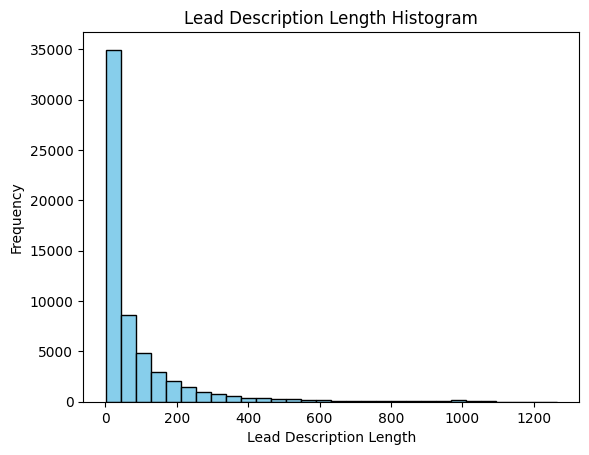

In [43]:
plt.hist(df_train['lead_desc_length'], bins=30, color='skyblue', edgecolor='black')

plt.title('Lead Description Length Histogram')
plt.xlabel('Lead Description Length')
plt.ylabel('Frequency')

plt.show()

# #14 inquiry_type


In [44]:
df_train['inquiry_type'] = df_train['inquiry_type'].str.lower().replace(r'[^a-zA-Z0-9]', '', regex=True)
df_test['inquiry_type'] = df_test['inquiry_type'].str.lower().replace(r'[^a-zA-Z0-9]', '', regex=True)

In [45]:
rows1 = df_train[df_train['inquiry_type'] == 'purchaseorquotation'].index
df_train.loc[rows1, 'inquiry_type'] = 'usageortechnicalconsultation'

In [46]:
df_train['inquiry_type'].value_counts(dropna = False)

quotationorpurchaseconsultation                                                                 42138
salesinquiry                                                                                     9981
productinformation                                                                               1237
usageortechnicalconsultation                                                                     1200
other                                                                                            1051
NaN                                                                                               941
trainings                                                                                         434
technicalconsultation                                                                             433
services                                                                                          415
requestforpartnership                                                             

In [47]:
df_test['inquiry_type'].value_counts(dropna = False)

quotationorpurchaseconsultation    3465
NaN                                1292
technicalconsultation               135
others                              110
productinformation                   68
requestforpartnership                63
usageortechnicalconsultation         52
services                             34
trainings                            21
other                                12
requestademo                          9
customersuggestions                   4
oemodmrequest                         3
mediainquiry                          2
requestfordistributorship             1
Name: inquiry_type, dtype: int64

# #15 product_category
- LG inquiry-to-buy 참고해서 재범주화
- 결측치 0.326717


In [48]:
df_train['product_category'] = df_train['product_category'].str.lower().str.replace(" ", "")
df_test['product_category'] = df_test['product_category'].str.lower().str.replace(" ", "")

In [49]:
product_mapping = { 'HVAC/ESS': ['control','multiinverter','arcondicionadoresidencial','tetooucasseteinverter', 'ventilation', 'vrf', 'multi-split', 'single-split','rac', 'ess','chiler','chiller', 'heating'],
                     'Commercial Display': ['highbrightness','lgone:quickseries','interactivedigitalboard','oledsignage', 'ledsignage', 'videowallsignage', 'interactivesignage', 'highbrightnesssignage', 'specialsignage', 'standardsignage', 'hoteltv', 'hospitaltv', 'softwaresolution', 'signagecaresolution', 'accessories', 'webos', 'one:quickseries', 'pro:centric'],
                      'IT PRODUCTS': ['monitor', 'laptop', 'projector', 'clouddevice','notebook', 'medicaldisplay'],
                      'Commerical Laundry': ['titan(largecapacity)', 'giant(standardcapacity)'],
                      'Compressor & Motor': ['reciprocatingcompressor', 'rotarycompressor', 'scrollcompressor', 'motor'],
                      'ADVANCED MATERIALS': ['antimicrobial', 'porcelainenamel', 'specialtyglass'] ,
                      'Robot': ['lgcloiuv-cbot', 'lgcloiservebot(shelftype)', 'lgcloiservebot(drawertype)', 'lgcloiguidebot'],
                      'Others':['etc.','others','other']
                    }

def map_product_category(value):
    for product, values in product_mapping.items():
        if value in values:
            return product
    return value  # 매핑되지 않은 경우 원래 값을 반환

df_train['product_category'] = df_train['product_category'].apply(map_product_category)
df_test['product_category'] = df_test['product_category'].apply(map_product_category)

In [50]:
df_train['product_category'].value_counts(dropna = False)

NaN                                                                                                  19374
Commercial Display                                                                                   18536
HVAC/ESS                                                                                             15508
Others                                                                                                2047
IT PRODUCTS                                                                                           1894
pc                                                                                                     114
videowall                                                                                               90
alllgvrfsystems                                                                                         80
commercialdisplay                                                                                       74
residentialairconditioner            

In [51]:
df_test['product_category'].value_counts(dropna = False)

NaN                   1858
HVAC/ESS              1663
Commercial Display    1409
Others                 207
IT PRODUCTS            134
Name: product_category, dtype: int64

# #16 product_subcategory
- 결측치 비율 0.8442638155786776


In [52]:
df_test['product_subcategory'].value_counts(dropna = False)

NaN                                                                                                     4478
Digital Signage or Commercial TVs                                                                         86
Transparent LED Film                                                                                      52
TR3DJ Series                                                                                              32
Interactive Digital Board                                                                                 29
Curvable OLED Signage                                                                                     24
High Brightness Series                                                                                    23
Transparent OLED Signage                                                                                  22
55" 500 nits FHD 0.44mm Even Bezel Video Wall                                                             20
55" 700 nits FHD 0.

# #17 product_modelname
- 결측치 비율 0.8443649977234018

In [53]:
df_test['product_modelname'].value_counts(dropna = False)

NaN                                    4709
LAT140                                   35
55EF5F-L                                 27
LWBC039                                  22
55VSH7J                                  19
55VSM5J                                  18
55EW5TK-A                                14
75TR3DJ                                  13
65TR3DJ                                  13
55VH7J-H                                 12
86TR3E                                   10
55VM5J-H                                 10
55VL5F-A                                  9
49VL5G-M                                  8
55EW5G-V                                  8
86TR3DJ                                   7
LSAA012                                   7
MAGNIT                                    6
LTAK140-GV                                6
LTAK140-GW                                6
55CT5WJ                                   6
55TC3CG-H                                 6
43HT3WJ                         

# #18 customer_country.1
- customer_country와 동일

In [54]:
df_test['customer_country.1'].value_counts(dropna = False)

/  / Peru                                                                                                      184
//United States                                                                                                160
Corporate /  /                                                                                                 135
/  / Brazil                                                                                                    132
/  / India                                                                                                     116
/ São Paulo / Brazil                                                                                           116
/  / United States                                                                                              76
/  / U.A.E                                                                                                      62
/  / Mexico                                                                     

# #19 cusomer_position
- 결측치 없음

In [55]:
df_train['customer_position'] = df_train['customer_position'].str.lower().replace(r'[^a-zA-Z0-9]', '', regex=True)
df_test['customer_position'] = df_test['customer_position'].str.lower().replace(r'[^a-zA-Z0-9]', '', regex=True)

# #20 response_corporate
- LG inquiry-to-buy 참고해서 재범주화



In [56]:
continent_mapping = { 'Europe': ['LGEWA', 'LGEMA', 'LGEWR', 'LGEUK', 'LGEFS', 'LGEES', 'LGEEH', 'LGEJE', 'LGEDG', 'LGEIS', 'LGEMK', 'LGEPL', 'LGESW', 'LGEHS', 'LGEAG', 'LGERO', 'LGECZ', 'LGEPT', 'LGEBN', 'LGESC', 'LGELS', 'LGENO','LGEMF'],
 'CSI' : ['LGEUA', 'LGEAK','LGERU', 'LGERA', 'LGERI', 'LGERM', 'LGEUR', 'LGELV'],
 'China': ['LGETR', 'LGERD', 'LGEHZ', 'LGEND', 'LGEHK', 'LGETT',  'LGEPN', 'LGECH','LGEQH', 'LGESH', 'LGESY', 'LGETA', 'LGEYT', 'LGEKS', 'LGENP', 'LGEHN', 'LGEQD'],
 'Asia': ['LGEIL', 'LGSI','LGEAP',  'LGETH', 'LGEVN', 'LGEIN', 'LGESL', 'LGEML', 'LGEJP', 'LGEPH', 'LGEVH','LGEKR'],
 'MIDDLE EAST & America': ['LGEEG', 'LGEAT', 'LGESR', 'LGETK', 'LGESA', 'LGEMC', 'LGEGF', 'LGEME', 'LGEOT', 'LGEEC', 'LGENI', 'LGEAF', 'LGELF','LGESJ'],
 'North America': ['LGEMX', 'LGEMM', 'LGEAI', 'LGECI', 'LGEUS', 'LGEMU', 'LGEMS', 'LGEMR'],
 'SOUTH & CENTRAL AMERICA' :['LGEAR', 'LGEAZ', 'LGECB', 'LGECL', 'LGEPR', 'LGEPS','LGERS', 'LGESP' ],
 }


df_train['Continent'] = df_train['response_corporate'].map({value: continent for continent, values in continent_mapping.items() for value in values})
df_test['Continent'] = df_test['response_corporate'].map({value: continent for continent, values in continent_mapping.items() for value in values})

# #21 expected_timeline
- 결측치 0.520464

In [57]:
df_train['expected_timeline'] = df_train['expected_timeline'].str.lower().replace(r'[^a-zA-Z0-9]', '', regex=True)
df_test['expected_timeline'] = df_test['expected_timeline'].str.lower().replace(r'[^a-zA-Z0-9]', '', regex=True)